In [1]:
import torch
import json
import os

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["mathtext.fontset"] = "stix"
matplotlib.rcParams["font.family"] = "STIXGeneral"
matplotlib.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}\usepackage{amssymb}"

In [2]:
ordered_titles = ["truss_kl", "rocket_mcvar", "vehicle_cs", "penicillin_tv"]

experiments_dict = {
    "truss_kl": [
        "truss_kl_hv/0.2",
        r"FourBarTruss($D$=3, $W$=1, $M$=2): KL($\tau$=0.2)",
        0.9,
    ],
    "rocket_mcvar": [
        "rocket_mcvar_hv/0.2",
        r"RocketInjector($D$=3, $W$=1, $M$=3): MCVaR($\tilde{a}$=0.8, $b$=10)",
        0.9,
    ],
    "vehicle_cs": [
        "vehicle_cs_hv/0.2",
        r"VehicleSafety($D$=3, $W$=2, $M$=3): CS($\tau$=0.2)",
        0.8,
    ],
    "penicillin_tv": [
        "penicillin_tv_hv/0.2",
        r"Penicillin($D$=4, $W$=3, $M$=3): TV($\tau$=0.2)",
        0.75,
    ],
}

ordered_algos = [
    "sobol",
    "robust-eui-ucb",
    "robust-eui-ts",
    "robust-eui",
    "eui",
    "resi-ts",
    "resi-ucb",
    "aresi-ucb",
    "nparego",
    "nehvi",
]

algos_dict = {
    "sobol": ["Sobol", "k"],
    "robust-eui-ucb": ["DRUI-UCB", "mediumseagreen"],
    "robust-eui-ts": ["DRUI-TS", "dodgerblue"],
    "robust-eui": ["EDRUI", "crimson"],
    "eui": ["EUI", "orange"],
    "resi-ts": ["RS-TS", "darkcyan"],
    "resi-ucb": ["RS-UCB", "paleturquoise"],
    "aresi-ucb": ["RS-AUCB", "peru"],
    "nparego": ["NParEGO", "orchid"],
    "nehvi": ["NEHVI", "pink"],
}

num_iterations = 100
t = torch.linspace(0, num_iterations, num_iterations + 1)

In [3]:
def plot_experiments(experiments_data):
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    plt.subplots_adjust(
        left=None, bottom=None, right=None, top=None, wspace=0.15, hspace=0.25
    )
    j = 101

    for i, title in enumerate(ordered_titles):
        plt.subplot(2, 2, i + 1)
        utility_dict = experiments_data[title]
        plot_title = experiments_dict[title][1]
        best_value = experiments_dict[title][2]
        for label in ordered_algos:
            algo_label = algos_dict[label][0]
            algo_colour = algos_dict[label][1]

            values = torch.log(best_value - utility_dict[label])
            med = values.quantile(q=0.5, dim=0)
            lq = values.quantile(q=0.25, dim=0)
            uq = values.quantile(q=0.75, dim=0)
            plt.plot(t[:j], med[:j], label=algo_label, color=algo_colour, linewidth=3)
            plt.fill_between(t[:j], lq[:j], uq[:j], alpha=0.1, color=algo_colour)
            plt.title(plot_title, fontsize=25)

        plt.xticks(fontsize=20)
        plt.xlim(0, num_iterations)
        plt.yticks(fontsize=20)
        plt.grid(alpha=0.5)

        if i > 1:
            plt.xlabel("Iteration", fontsize=25)

        if i in [0, 2]:
            plt.ylabel("Log regret", fontsize=25)

    handles = []
    labels = []

    for a in ordered_algos:
        label = algos_dict[a][0]
        color = algos_dict[a][1]
        line = mlines.Line2D([], [], color=color, linestyle="-", linewidth=5)
        patch = mpatches.Patch(color=color, alpha=0.25)
        handles += [(line, patch)]
        labels += [label]

    axes[1, 0].legend(
        handles=handles,
        labels=labels,
        loc=(0.03, -0.60),
        ncol=5,
        fontsize=25,
    )
    plt.show()
    return fig

# General

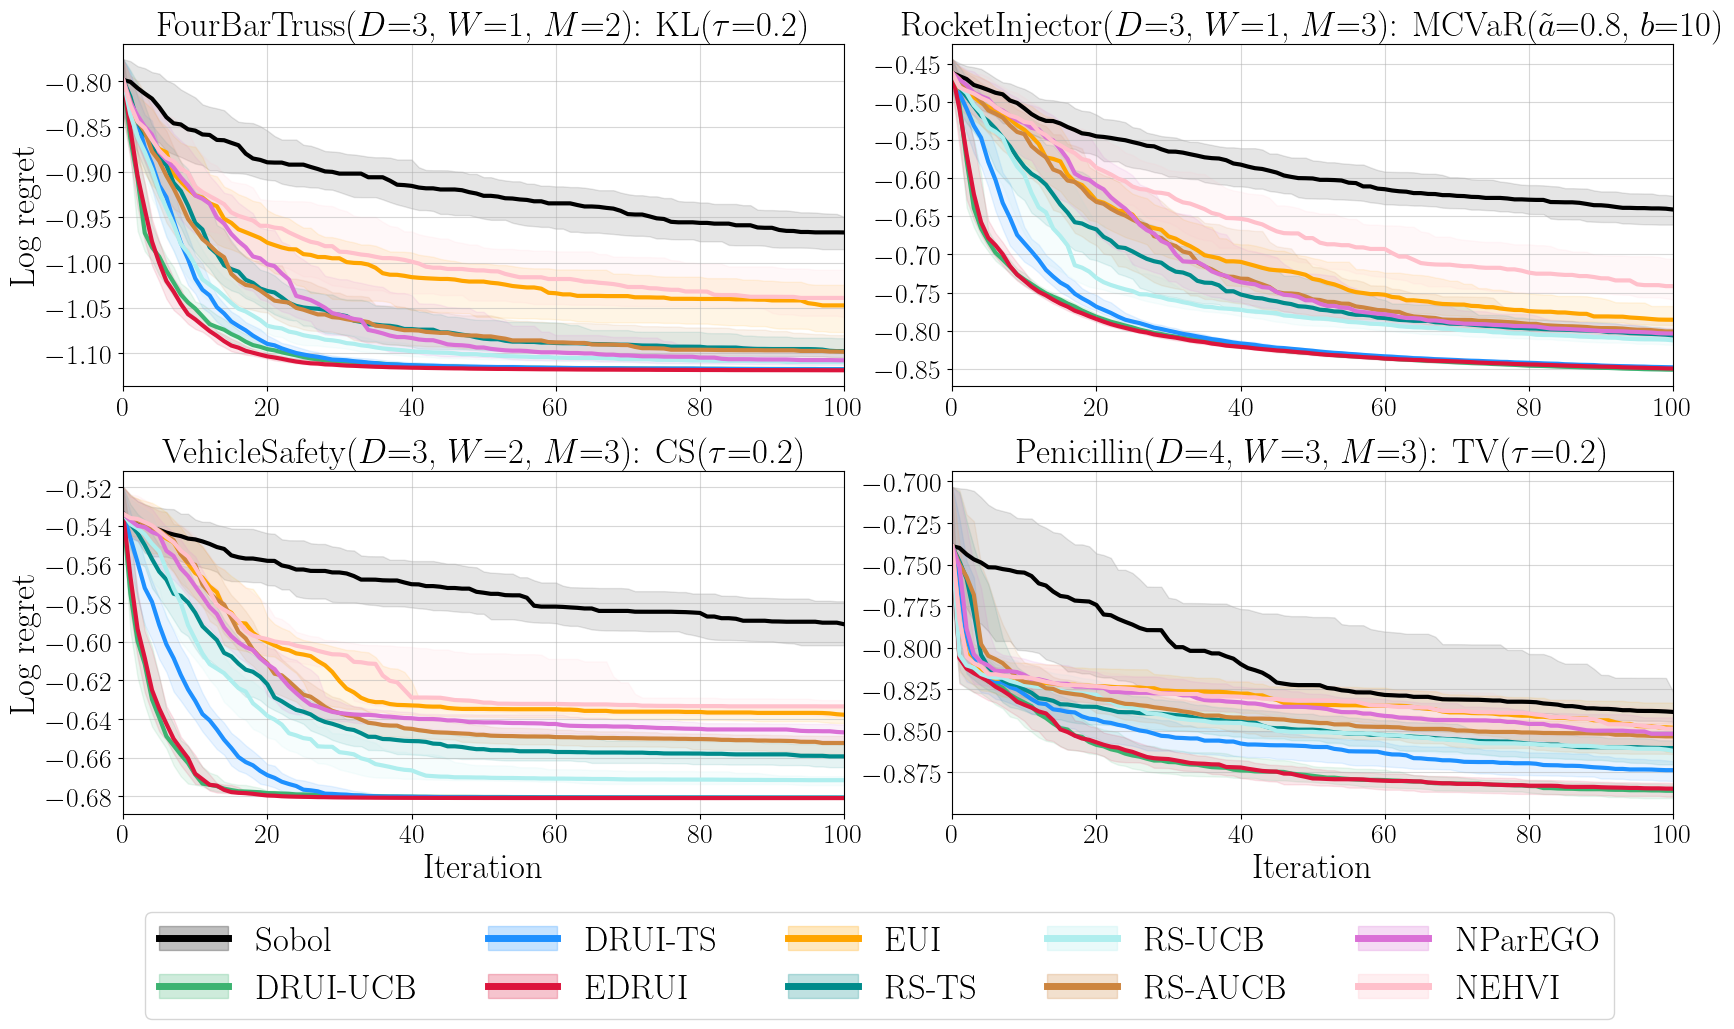

In [4]:
fig = plot_experiments(torch.load("data/robust_experiments_general_data.pt"))

# Simulated

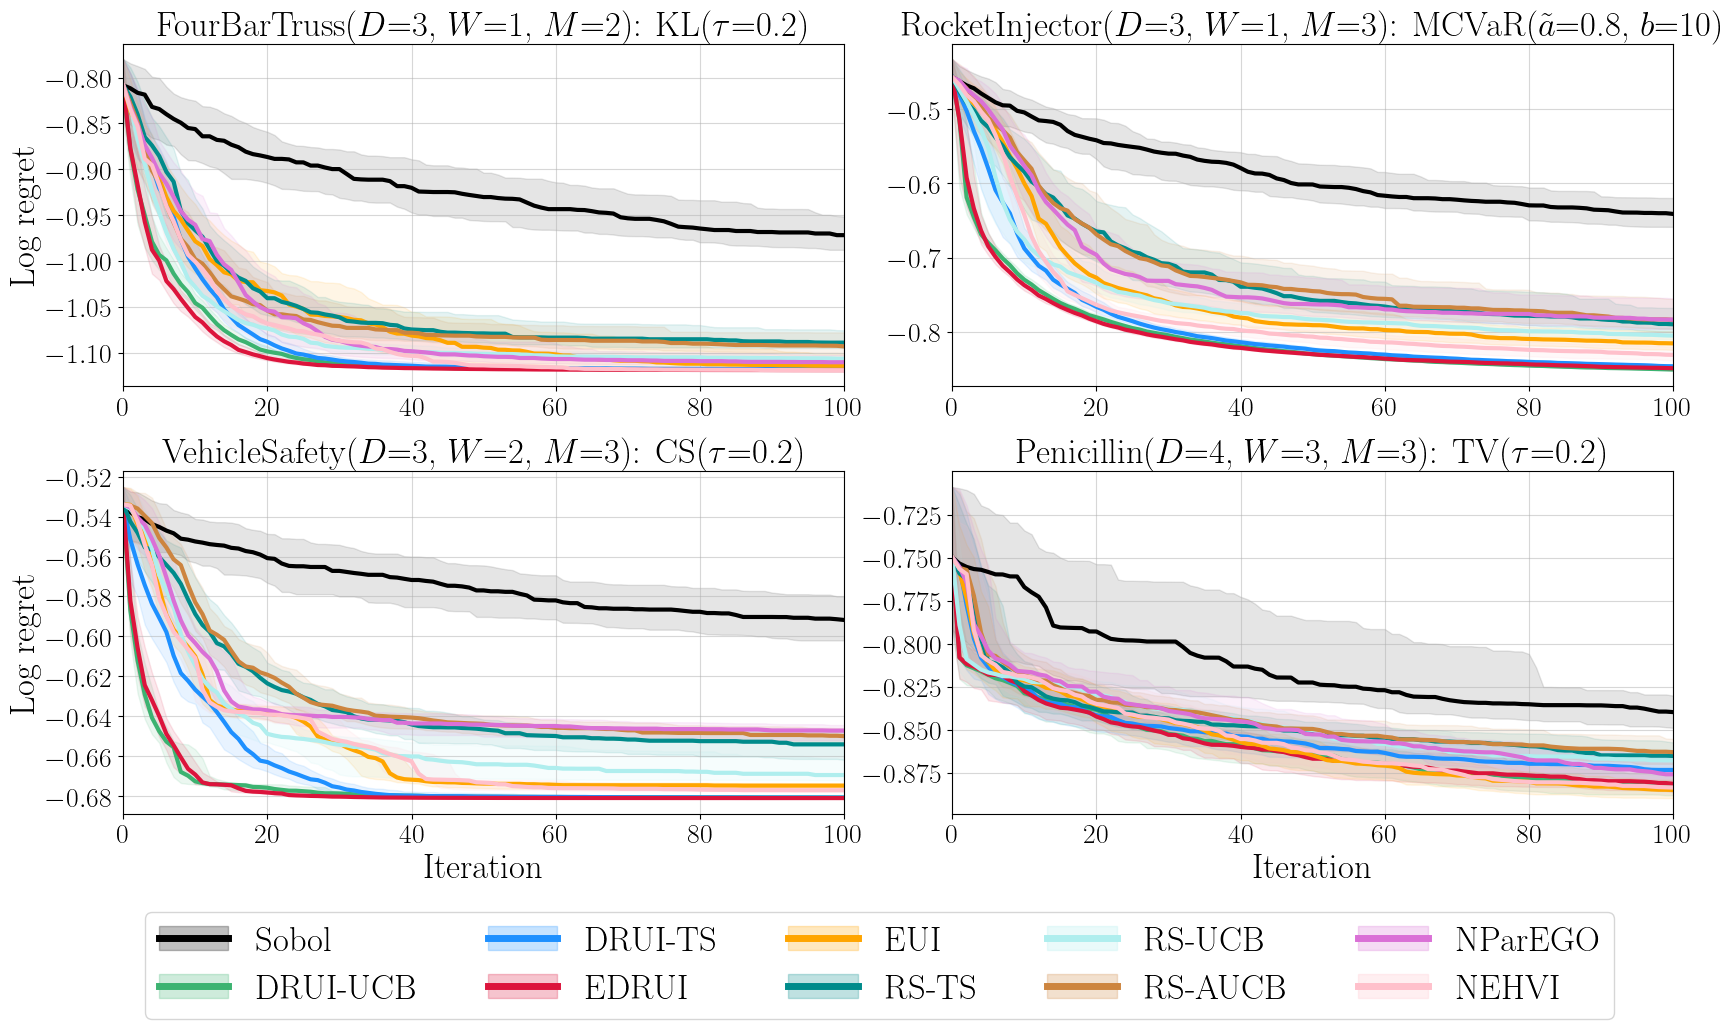

In [5]:
fig = plot_experiments(torch.load("data/robust_experiments_simulated_data.pt"))